# darts

Test library darts for time series forecasting.

## Load data

In [2]:
import darts
import polars as pl

In [3]:
from src.energy_forecast.model.train import get_train_test_val_split
from src.energy_forecast.dataset import TrainingDataset

config = {"n_out": 1, "energy": "all", "features": ["diff", "tavg", "hum_avg", "weekend", "holiday"]}
ds = TrainingDataset(config)
ds.load_feat_data()
ds.preprocess()
ds = get_train_test_val_split(ds)

2025-03-28 09:53:07.978887: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-28 09:53:07.991389: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-28 09:53:08.007275: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-28 09:53:08.013162: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-28 09:53:08.024226: I tensorflow/core/platform/cpu_feature_guar

2025-03-28 09:53:10.683 | INFO     | src.energy_forecast.dataset:preprocess:405 - Training Features: ['diff', 'tavg', 'hum_avg', 'weekend', 'holiday']
2025-03-28 09:53:11.097 | INFO     | src.energy_forecast.model.train:get_train_test_val_split:171 - Train data shape: (73333, 4)
2025-03-28 09:53:11.098 | INFO     | src.energy_forecast.model.train:get_train_test_val_split:172 - Test data shape: (9147, 4)
2025-03-28 09:53:11.098 | INFO     | src.energy_forecast.model.train:get_train_test_val_split:173 - Validation data shape: (9075, 4)


In [8]:
from src.energy_forecast.dataset import Dataset

ds = Dataset()
ds.create()
ds.df

2025-03-28 09:54:59.115 | INFO     | src.energy_forecast.dataset:create:140 - Creating daily dataset
2025-03-28 09:54:59.131 | INFO     | src.energy_forecast.dataset:create:145 - Number of rows: 96140
2025-03-28 09:54:59.140 | INFO     | src.energy_forecast.dataset:create:147 - Number of sensors: 142


id,datetime,diff,value,source
str,str,f64,f64,str
"""1a9266de-dfff-11eb-9d61-02b402…","""2022-04-04T00:00:00.000000""",524.0,231981.0,"""kinergy"""
"""1a9266de-dfff-11eb-9d61-02b402…","""2022-04-05T00:00:00.000000""",1215.0,233196.0,"""kinergy"""
"""1a9266de-dfff-11eb-9d61-02b402…","""2022-04-06T00:00:00.000000""",897.0,234093.0,"""kinergy"""
"""1a9266de-dfff-11eb-9d61-02b402…","""2022-04-07T00:00:00.000000""",937.0,235030.0,"""kinergy"""
"""1a9266de-dfff-11eb-9d61-02b402…","""2022-04-08T00:00:00.000000""",1009.0,236039.0,"""kinergy"""
…,…,…,…,…
"""400982GVG""","""2022-03-11T00:00:00.000000""",119.9,2.7159e6,"""legacy"""
"""400982GVG""","""2022-03-12T00:00:00.000000""",95.2,2717017.2,"""legacy"""
"""400982GVG""","""2022-03-13T00:00:00.000000""",89.6,2.7180e6,"""legacy"""


In [20]:
ds.clean()

2025-03-28 10:04:13.459 | INFO     | src.energy_forecast.dataset:clean:151 - Cleaning daily dataset
2025-03-28 10:04:13.460 | INFO     | src.energy_forecast.dataset:clean:153 - Number of rows: 96140
2025-03-28 10:04:13.460 | INFO     | src.energy_forecast.dataset:clean:155 - Removing negative diff values
2025-03-28 10:04:13.463 | INFO     | src.energy_forecast.dataset:clean:157 - Number of rows after removing negative values: 96101
2025-03-28 10:04:13.463 | INFO     | src.energy_forecast.dataset:clean:159 - Filter connection error values
2025-03-28 10:04:13.469 | INFO     | src.energy_forecast.util:get_missing_dates:87 - Missing dates for sensor edcafda6-fe6f-4ca3-bb3d-f0c5fbac8f4c: 44
2025-03-28 10:04:13.473 | INFO     | src.energy_forecast.dataset:filter_connection_errors:111 - Filtered 7 rows for ID edcafda6-fe6f-4ca3-bb3d-f0c5fbac8f4c
2025-03-28 10:04:13.476 | INFO     | src.energy_forecast.util:get_missing_dates:87 - Missing dates for sensor 7dd30c54-3be7-4a3c-b5e0-9841bb3ffddb: 3

In [21]:
ds.df

id,datetime,diff,value,source
str,datetime[μs],f64,f64,str
"""5e2fd59d-603a-488b-a525-513541…",2022-10-26 00:00:00,194.0,551644.0,"""dh"""
"""5e2fd59d-603a-488b-a525-513541…",2022-10-27 00:00:00,126.0,551770.0,"""dh"""
"""5e2fd59d-603a-488b-a525-513541…",2022-10-28 00:00:00,146.0,551916.0,"""dh"""
"""5e2fd59d-603a-488b-a525-513541…",2022-10-29 00:00:00,190.0,552106.0,"""dh"""
"""5e2fd59d-603a-488b-a525-513541…",2022-10-30 00:00:00,160.0,552266.0,"""dh"""
…,…,…,…,…
"""a0bb40c4-7d73-4c5d-91bd-d82fe7…",2024-05-10 00:00:00,581.0,1.027976e6,"""dh"""
"""a0bb40c4-7d73-4c5d-91bd-d82fe7…",2024-05-11 00:00:00,581.0,1.028557e6,"""dh"""
"""a0bb40c4-7d73-4c5d-91bd-d82fe7…",2024-05-12 00:00:00,630.0,1.029187e6,"""dh"""


In [22]:
from darts.utils.missing_values import fill_missing_values

data_list_raw = darts.TimeSeries.from_group_dataframe(
    ds.df.to_pandas()[["datetime", "id", "value"]], group_cols="id", time_col="datetime",
    value_cols=["value"], freq="D", fill_missing_dates=True)
data_list_filled = list()
for t in data_list_raw:
    data_list_filled.append(fill_missing_values(t, "auto", method="linear"))  # pandas interpolate method arguments

<Axes: xlabel='datetime'>

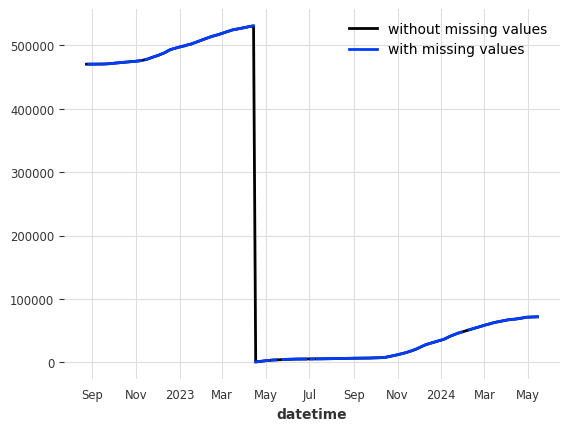

In [39]:
n = 113
data_list_filled[n].plot(label="without missing values")
data_list_raw[n].plot(label="with missing values")

In [26]:
ds.df.to_pandas().iloc[ds.train_idxs][["datetime", "id", "diff"]]

,datetime,id,diff
16969,2020-03-29,400352PVG,107.2
16970,2020-03-30,400352PVG,121.9
16971,2020-03-31,400352PVG,115.5
16972,2020-04-01,400352PVG,114.7
16973,2020-04-02,400352PVG,103.4
...,...,...,...
67599,2022-02-14,400697GVG,673.9
67600,2022-02-15,400697GVG,742.6
67601,2022-02-16,400697GVG,657.0
67602,2022-02-17,400697GVG,734.9


<Axes: xlabel='datetime'>

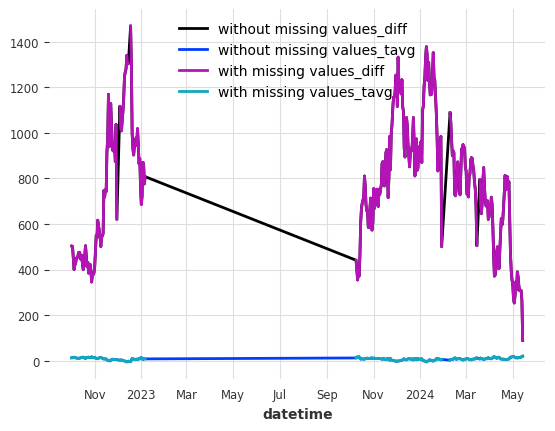

In [71]:
from darts.utils.missing_values import fill_missing_values

train_list_raw = darts.TimeSeries.from_group_dataframe(
    ds.df.to_pandas().iloc[ds.train_idxs][["datetime", "id", "diff", "tavg"]], group_cols="id", time_col="datetime",
    value_cols=["diff", "tavg"], freq="D", fill_missing_dates=True)
train_list_filled = list()
for t in train_list_raw:
    train_list_filled.append(fill_missing_values(t, "auto", method="linear"))  # pandas interpolate method arguments
n = 1
train_list_filled[n].plot(label="without missing values")
train_list_raw[n].plot(label="with missing values")

In [73]:
len(train), train[0].shape, train[1].shape

(138, (279, 1, 1), (591, 1, 1))

In [ ]:
from darts.models import RNNModel

rnn = RNNModel(
    model="RNN",
    hidden_dim=20,
    n_rnn_layers=2,
    dropout=0.05,
    batch_size=32,
    n_epochs=50,
    input_chunk_length=31,  # past time steps fed to model at prediction step
    training_length=64,  # length of input and output time series during training
)

rnn.fit(train_list_raw)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 1.3 K  | train
6 | V               | Linear           | 42     | train
-------------------------------------------------------------
1.4 K     Trainable params
0         Non-trainable params
1.4 K     Total params
0.005     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Epoch 2:  19%|█▉        | 1447/7690 [00:27<02:00, 51.85it/s, train_loss=nan.0]